# öğrenci skoru k en yakın komşu  ve karar ağacı (cart)
# student score knn and cart algorithm


### VERI SETINI yükleme

In [139]:
import pandas as pd
import  seaborn as sns 
import matplotlib.pyplot as plt

df = pd.read_excel(r"C:\Users\ASUS\Desktop\ogr_skor.xlsx" )
df.head()



id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1                       47              Doctor          90             86   
2                       13  Government Officer          81             97   
3                        3              Artist          71             74   
4                       10             Unknown          84             77   

   physics_score  chemistry_score  biology_score  english_score  \
0             93               97             63             80   
1             96              100             90             88   
2             95               96             65             77   
3             88               80             89             63   
4             65               65             80             74   

   geography_score  
0               87  
1               90  
2               94  
3               86  
4               76

df.info()

### GEREKLİ OLMAYAN SÜTÜNLERİ SİLME

In [140]:
sutunu_sil = ["id", "first_name" , "last_name" , "email"]
sutunu_sil = [col.strip() for col in sutunu_sil] 

df.drop(columns =sutunu_sil, inplace=True)

df.head()

gender  part_time_job  absence_days  extracurricular_activities  \
0    male          False             3                       False   
1  female          False             2                       False   
2  female          False             9                        True   
3  female          False             5                       False   
4    male          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1                       47              Doctor          90             86   
2                       13  Government Officer          81             97   
3                        3              Artist          71             74   
4                       10             Unknown          84             77   

   physics_score  chemistry_score  biology_score  english_score  \
0             93               97             63             80   
1             96              100             90             88   
2             95               96             65             77   
3             88               80             89             63   
4             65               65             80             74   

   geography_score  
0               87  
1               90  
2               94  
3               86  
4               76

### VERI ANALİZİ

Text(0, 0.5, 'career aspiration')

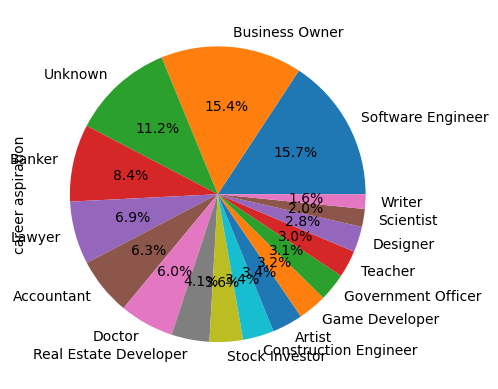

In [141]:
#veri görselleştirme

df.career_aspiration.value_counts().plot(kind="pie", autopct='%1.1f%%',)
plt.ylabel("career aspiration")

### KATEGORİK VERİLERİ SAYISAL HALİNE DÖNŞTÜRME

In [142]:
df["gender"] = df.gender.map({"male" : 0 , "female" : 1} )
df['part_time_job'] = df['part_time_job'].astype(str)
df['part_time_job'] = df['part_time_job'].str.lower()
df['part_time_job'] = df['part_time_job'].map({"false": 0, "true": 1})
df['extracurricular_activities'] = df['extracurricular_activities'].astype(str)
df['extracurricular_activities'] = df['extracurricular_activities'].str.lower()
df["extracurricular_activities"] = df.extracurricular_activities.map({"false" : 0 , "true" : 1})
df["career_aspiration"] = df.career_aspiration.map({"Lawyer" : 0 , "Doctor" : 1, "Government Officer" : 2,"Artist":3, "Unknown":4,"Software Engineer":5, "Teacher":6, "Business Owner":7, "Scientist":8,"Banker":9, "Writer":10, "Accountant":11, "Designer":12,"Construction Engineer":13, "Game Developer":14, "Stock Investor":15,"Real Estate Developer":16 })
df.head()
df.tail()

gender  part_time_job  absence_days  extracurricular_activities  \
1995       0              0             2                           0   
1996       0              0             2                           0   
1997       1              0             5                           0   
1998       1              1            10                           1   
1999       1              0             5                           0   

      weekly_self_study_hours  career_aspiration  math_score  history_score  \
1995                       30                 13          83             77   
1996                       20                  5          89             65   
1997                       14                  5          97             85   
1998                        5                  7          51             96   
1999                       27                 11          82             99   

      physics_score  chemistry_score  biology_score  english_score  \
1995             84               73             75             84   
1996             73               80             87             67   
1997             63               93             68             94   
1998             72               89             95             88   
1999             91               69             83             93   

      geography_score  
1995               82  
1996               73  
1997               78  
1998               75  
1999              100

### SKLEARN , NUMPY KÜTÜPHANELERİ

In [143]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



In [144]:
df.describe().T

count     mean        std   min    25%   50%  \
gender                      2000.0   0.5010   0.500124   0.0   0.00   1.0   
part_time_job               2000.0   0.1580   0.364832   0.0   0.00   0.0   
absence_days                2000.0   3.6655   2.629271   0.0   2.00   3.0   
extracurricular_activities  2000.0   0.2040   0.403070   0.0   0.00   0.0   
weekly_self_study_hours     2000.0  17.7555  12.129604   0.0   5.00  18.0   
career_aspiration           2000.0   6.9130   4.377329   0.0   4.00   7.0   
math_score                  2000.0  83.4520  13.224906  40.0  77.00  87.0   
history_score               2000.0  80.3320  12.736046  50.0  69.75  82.0   
physics_score               2000.0  81.3365  12.539453  50.0  71.00  83.0   
chemistry_score             2000.0  79.9950  12.777895  50.0  69.00  81.0   
biology_score               2000.0  79.5815  13.722190  30.0  69.00  81.0   
english_score               2000.0  81.2775  12.027087  50.0  72.00  83.0   
geography_score             2000.0  80.8880  11.637705  60.0  71.00  81.0   

                             75%    max  
gender                       1.0    1.0  
part_time_job                0.0    1.0  
absence_days                 5.0   10.0  
extracurricular_activities   0.0    1.0  
weekly_self_study_hours     28.0   50.0  
career_aspiration           10.0   16.0  
math_score                  93.0  100.0  
history_score               91.0  100.0  
physics_score               92.0  100.0  
chemistry_score             91.0  100.0  
biology_score               91.0  100.0  
english_score               91.0   99.0  
geography_score             91.0  100.0

In [145]:
df['gender'].describe()

count    2000.000000
mean        0.501000
std         0.500124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

In [147]:
X = df.drop('career_aspiration', axis=1)
y = df['career_aspiration']




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




### EN İYİ K DEĞERLERİ BELİRLEME

In [148]:

k_values = [3, 5, 7, 9, 11 ,17,19,23,29,31]
train_accuracies = []
test_accuracies = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    

    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    print(f"K={k}: Test Doğruluk Skoru = {test_accuracy}")

K=3: Test Doğruluk Skoru = 0.3125
K=5: Test Doğruluk Skoru = 0.3075
K=7: Test Doğruluk Skoru = 0.3425
K=9: Test Doğruluk Skoru = 0.365
K=11: Test Doğruluk Skoru = 0.38
K=17: Test Doğruluk Skoru = 0.4
K=19: Test Doğruluk Skoru = 0.395
K=23: Test Doğruluk Skoru = 0.395
K=29: Test Doğruluk Skoru = 0.41
K=31: Test Doğruluk Skoru = 0.395


### KNN Modeli Oluşturma


In [151]:
knn = KNeighborsClassifier(n_neighbors=29,metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=29)

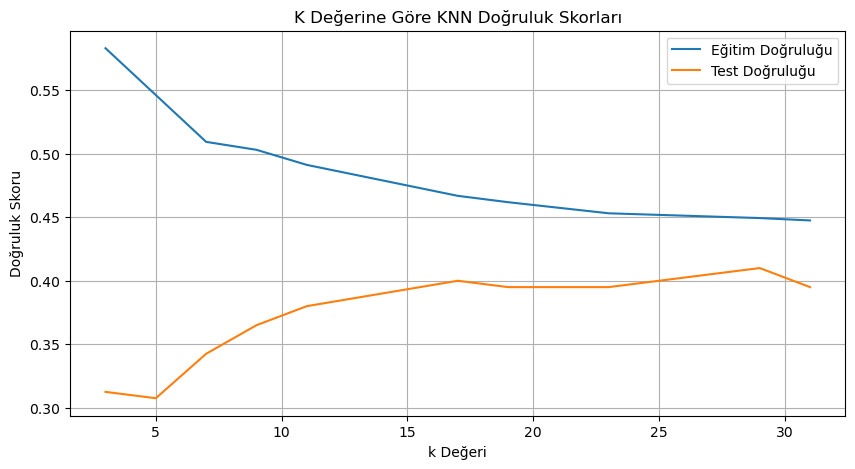

In [152]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_accuracies, label='Eğitim Doğruluğu')
plt.plot(k_values, test_accuracies, label='Test Doğruluğu')
plt.xlabel('k Değeri')
plt.ylabel('Doğruluk Skoru')
plt.title('K Değerine Göre KNN Doğruluk Skorları')
plt.legend()
plt.grid(True)
plt.show()

### KARŞILAŞTIRMA

In [153]:
y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
result_df = pd.DataFrame({"Gerçek kariyer arzusu": y_test, "pred": y_pred,"doğrululuk:": accuracy})
result_df

Gerçek kariyer arzusu  pred  doğrululuk:
1860                      9     5         0.41
353                      14    14         0.41
1333                      6     9         0.41
905                      16     7         0.41
1289                     14    14         0.41
...                     ...   ...          ...
965                      11    11         0.41
1284                      9     9         0.41
1739                      5     1         0.41
261                       3     6         0.41
535                      14    14         0.41

[400 rows x 3 columns]

### en fazla doğru bir şekilde tahmin edilen 7.kariyerdir çünkü  (en çok fazla satır sayısına sahibi olan 7.kariyer(buissnes owner))

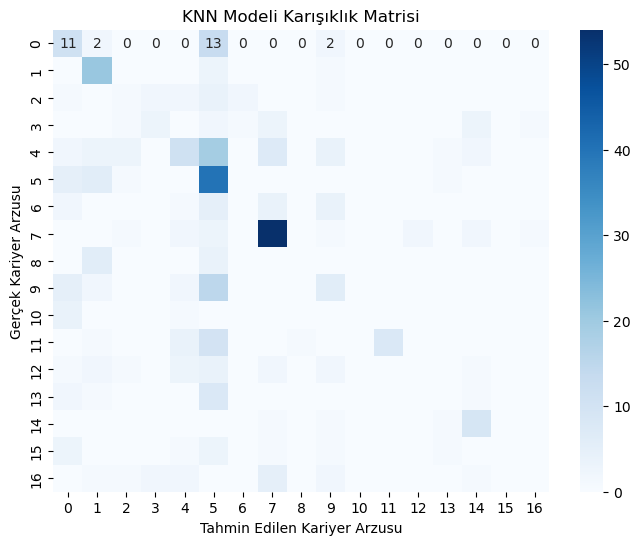

In [154]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.xlabel('Tahmin Edilen Kariyer Arzusu')
plt.ylabel('Gerçek Kariyer Arzusu')
plt.title('KNN Modeli Karışıklık Matrisi')
plt.show()

### (örnekleme )her bir kariyer için belli bir satır sayısı aldım (doğrululuk skoru olumsuz etkilendi)

In [155]:
desired_sample_count = 300
grouped = df.groupby('career_aspiration')
sampled_dfs = [group.sample(n=min(len(group), desired_sample_count), random_state=42) for name, group in grouped]
balanced_df = pd.concat(sampled_dfs)

X = balanced_df.drop('career_aspiration', axis=1)
y = balanced_df['career_aspiration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


bknn = KNeighborsClassifier(n_neighbors=29, metric='euclidean')
bknn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
result_df = pd.DataFrame({"Gerçek kariyer arzusu": y_test, "pred": y_pred,"doğrululuk:": accuracy})
result_df

Gerçek kariyer arzusu  pred  doğrululuk:
247                      15     0     0.434343
970                      13     5     0.434343
1465                      5     5     0.434343
204                       3     3     0.434343
763                      13     5     0.434343
...                     ...   ...          ...
584                       0     0     0.434343
933                       5     5     0.434343
1683                      2     3     0.434343
1859                      0     9     0.434343
438                       1     1     0.434343

[396 rows x 3 columns]

In [156]:
df.head()

gender  part_time_job  absence_days  extracurricular_activities  \
0       0              0             3                           0   
1       1              0             2                           0   
2       1              0             9                           1   
3       1              0             5                           0   
4       0              0             5                           0   

   weekly_self_study_hours  career_aspiration  math_score  history_score  \
0                       27                  0          73             81   
1                       47                  1          90             86   
2                       13                  2          81             97   
3                        3                  3          71             74   
4                       10                  4          84             77   

   physics_score  chemistry_score  biology_score  english_score  \
0             93               97             63             80   
1             96              100             90             88   
2             95               96             65             77   
3             88               80             89             63   
4             65               65             80             74   

   geography_score  
0               87  
1               90  
2               94  
3               86  
4               76

### YENİ VERİ İLE DENEME 

In [158]:
new_data = pd.DataFrame([[1, 0,12,1,70,50,70,80,99,90,90,100]], columns=X_train.columns)
tahmin = knn.predict(new_data)
print("Tahmin edilen meslek:", tahmin[0])


Tahmin edilen meslek: 1


In [159]:
df.career_aspiration.unique()
class_label_map = {
    0: 'Lawyer',
    1: 'Doctor',
    2: 'Government Officer',
    3: 'Artistr',
    4:'Software Engineer' ,
    5:'Teacher',
    6:'Business Owner',
    7:'Scientist',
   8:'Banker',
   9:'Writer',
   10: 'Accountant',
   11:'Designer',
   12:'Construction Engineer',
    13:'Game Developer',
   14:'Stock Investor',
   15:'Real Estate Developer'
}

In [160]:

predicted_profession_scalar =tahmin[0]

predicted_profession_category = class_label_map.get(predicted_profession_scalar)

print("Tahmin edilen meslek:", predicted_profession_category)

Tahmin edilen meslek: Doctor


### KARAR AĞACI (CART)YÖNTEMİYLE 

In [161]:
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import pandas as pd
import  seaborn as sns 
import matplotlib.pyplot as plt

### verisetini eğitim ve test kümelerine ayırdım

In [162]:
feature_cols = ['gender', 'part_time_job', 'absence_days', 'extracurricular_activities',
                'weekly_self_study_hours', 'math_score', 'history_score', 'physics_score',
                'chemistry_score', 'biology_score', 'english_score', 'geography_score']
X = df[feature_cols]
y = df['career_aspiration']

# ----------verisetini eğitim ve test kümelerine ayırdım

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# karar ağacı kart yöntemiyle tahim ettirdim


In [125]:
KARAR = DecisionTreeClassifier()

KARAR = KARAR.fit(X_train,y_train)

y_pred = KARAR.predict(X_test)

In [126]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.4066666666666667


In [127]:
df.head()

gender  part_time_job  absence_days  extracurricular_activities  \
0       0              0             3                           0   
1       1              0             2                           0   
2       1              0             9                           1   
3       1              0             5                           0   
4       0              0             5                           0   

   weekly_self_study_hours  career_aspiration  math_score  history_score  \
0                       27                  0          73             81   
1                       47                  1          90             86   
2                       13                  2          81             97   
3                        3                  3          71             74   
4                       10                  4          84             77   

   physics_score  chemistry_score  biology_score  english_score  \
0             93               97             63             80   
1             96              100             90             88   
2             95               96             65             77   
3             88               80             89             63   
4             65               65             80             74   

   geography_score  
0               87  
1               90  
2               94  
3               86  
4               76

In [128]:
df.career_aspiration.unique()
class_label_map = {
    0: 'Lawyer',
    1: 'Doctor',
    2: 'Government Officer',
    3: 'Artist',
    4:'Software Engineer' ,
    5:'Teacher',
    6:'Business Owner',
    7:'Scientist',
   8:'Banker',
   9:'Writer',
   10: 'Accountant',
   11:'Designer',
   12:'Construction Engineer',
    13:'Game Developer',
   14:'Stock Investor',
   15:'Real Estate Developer'
}

new_data2 = pd.DataFrame([[1,0,30,0,60,90,80,100,90,80,90,100]], columns=X_train.columns)
tahmin2 = KARAR.predict(new_data2)
print("Tahmin edilen meslek:", tahmin2[0])
predicted_profession_scalar2 =tahmin2[0]

predicted_profession_category2 = class_label_map.get(predicted_profession_scalar2)

print("Tahmin edilen kariyer hedefi:",tahmin2 , predicted_profession_category2 )


Tahmin edilen meslek: 1
Tahmin edilen kariyer hedefi: [1] Doctor


In [129]:
from sklearn.tree import  plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.figure(figsize=(100, 100))
plot_tree(KARAR, filled=True, rounded=True, fontsize=12)
plt.show()

# 7.Kariyer tahmin edilen en yüksek kariyer arzusudur

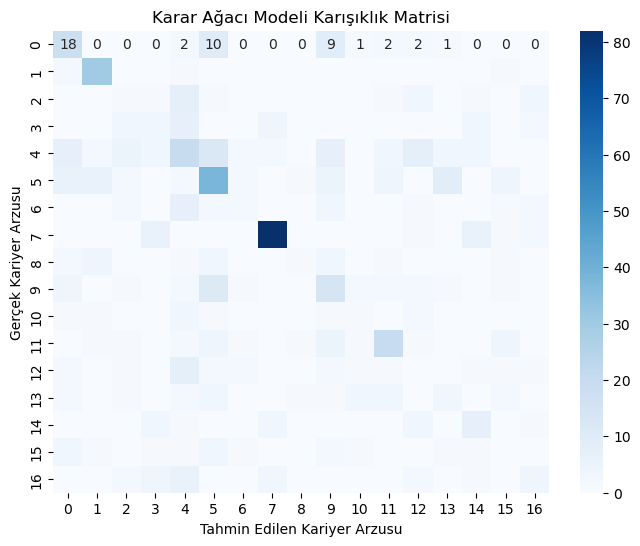

In [130]:

y_pred = KARAR.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.xlabel('Tahmin Edilen Kariyer Arzusu')
plt.ylabel('Gerçek Kariyer Arzusu')
plt.title('Karar Ağacı Modeli Karışıklık Matrisi')
plt.show()
